#**Install Library**

In [17]:
!pip install basemap-data-hires
!pip install seaborn
!pip install basemap numpy pandas scipy
!pip install cartopy

#**Import Library**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import linregress
import datetime
from datetime import datetime
import seaborn as sns


#**Read Dataset**

In [19]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"
# Load each dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv")

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the merged DataFrame
merged_df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3874,2020-01-04T08:29:18.262Z,31.7534,49.9008,10.0,4.1,mb,NaN,152.0,4.844,0.58,...,2020-03-21T17:13:50.040Z,"59 km NNE of R?mhormoz, Iran",earthquake,8.4,2.0,0.145,13.0,reviewed,us,us
3875,2020-01-04T08:24:38.167Z,25.4990,63.1389,10.0,4.9,mb,NaN,97.0,6.304,0.68,...,2020-03-21T17:13:35.040Z,southwestern Pakistan,earthquake,10.0,1.9,0.079,51.0,reviewed,us,us
3876,2020-01-02T10:03:06.225Z,34.1629,60.4080,10.0,4.3,mb,NaN,116.0,1.536,1.43,...,2020-03-21T17:13:33.040Z,"72 km SSW of T?yb?d, Iran",earthquake,8.7,1.9,0.104,26.0,reviewed,us,us
3877,2020-01-02T04:29:06.582Z,34.1326,60.2681,10.0,5.5,mww,NaN,45.0,1.655,0.91,...,2022-03-04T17:36:59.119Z,"81 km SW of T?yb?d, Iran",earthquake,6.6,1.7,0.089,12.0,reviewed,us,us
3878,2020-01-01T12:59:03.756Z,30.6259,51.6449,10.0,4.2,mb,NaN,76.0,6.699,0.58,...,2020-03-21T17:13:31.040Z,"7 km SE of Yasuj, Iran",earthquake,4.5,1.9,0.098,29.0,reviewed,us,us


In [20]:
df = merged_df

# Mengonversi kolom 'time' menjadi tipe datetime
df['time'] = pd.to_datetime(df['time'])

# Menerapkan filter untuk tahun 1966 - 2016
df_filtered = df[(df['time'].dt.year >= 1972) & (df['time'].dt.year <= 2022)]

# Menampilkan DataFrame yang telah difilter
df = df_filtered
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,NaN,NaN,NaN,0.9,...,2014-11-07T00:41:24.357Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,24.0,reviewed,us,us
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,NaN,NaN,NaN,1.0,...,2022-04-27T21:27:51.633Z,"117 km NNE of Bandar Abbas, Iran",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:41:16.294Z,"53 km NW of Yasuj, Iran",earthquake,NaN,8.0,NaN,32.0,reviewed,us,us
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,NaN,NaN,NaN,0.7,...,2020-08-28T21:42:24.936Z,Eastern Iran,earthquake,NaN,NaN,NaN,26.0,reviewed,us,us
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:41:15.759Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,11.0,reviewed,us,us
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,33.0,4.6,mb,NaN,NaN,NaN,0.5,...,2014-11-07T00:41:15.063Z,"60 km SSW of B?rjand, Iran",earthquake,NaN,NaN,NaN,9.0,reviewed,us,us
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,40.6,5.3,mw,NaN,NaN,NaN,1.1,...,2022-04-27T21:30:18.808Z,"25 km SSW of B?rjand, Iran",earthquake,NaN,7.7,NaN,NaN,reviewed,us,hrv
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,42.1,4.9,mb,NaN,NaN,NaN,1.4,...,2014-11-07T00:41:12.852Z,"41 km ESE of ?bd?n?n, Iran",earthquake,NaN,10.0,NaN,15.0,reviewed,us,us
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,10.0,4.6,mb,NaN,NaN,NaN,1.5,...,2014-11-07T00:41:11.061Z,Persian Gulf,earthquake,NaN,NaN,NaN,3.0,reviewed,us,us
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,45.8,4.7,mb,NaN,NaN,NaN,0.6,...,2014-11-07T00:41:07.614Z,"49 km N of Bandar Abbas, Iran",earthquake,NaN,7.2,NaN,19.0,reviewed,us,us


In [21]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df = df_selected_columns
df.head(10)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,33.0,4.6,mb,us,usp0003afd,2014-11-07T00:41:15.063Z,earthquake,reviewed,us,us
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,40.6,5.3,mw,us,usp0003af8,2022-04-27T21:30:18.808Z,earthquake,reviewed,us,hrv
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,42.1,4.9,mb,us,usp0003a0e,2014-11-07T00:41:12.852Z,earthquake,reviewed,us,us
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,10.0,4.6,mb,us,usp00039v1,2014-11-07T00:41:11.061Z,earthquake,reviewed,us,us
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,45.8,4.7,mb,us,usp00039q3,2014-11-07T00:41:07.614Z,earthquake,reviewed,us,us


In [22]:
def bvalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return b*(-1)

def avalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return a

def generate_GR_Adeli_Panakkat_features(earthquake_dataset, time_window):
    earthquake_dataset['b-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=bvalue_OLS,raw = False).shift(1)
    earthquake_dataset['a-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=avalue_OLS,raw = False).shift(1)
    earthquake_dataset['Max magnitude expected'] = earthquake_dataset['a-value']/earthquake_dataset['b-value']

    return earthquake_dataset

In [32]:
iran_region = df[df.mag >= 4.0].reset_index(drop = True)

In [33]:
iran_region = generate_GR_Adeli_Panakkat_features(iran_region, 40)

In [34]:
iran_region.tail()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected,year
3405,2020-01-22 19:23:13.391000+00:00,28.0371,56.7661,10.00,5.0,mww,us,us60007d34,2020-04-11T18:20:38.040Z,earthquake,reviewed,us,us,1.052842,6.414403,6.092462,2020
3406,2020-01-09 10:51:58.348000+00:00,34.5736,45.5067,4.49,4.9,mb,us,us70006wvp,2020-04-02T21:27:57.040Z,earthquake,reviewed,us,us,1.061777,6.466681,6.090432,2020
3407,2020-01-08 02:20:02.005000+00:00,29.1744,51.3041,10.00,4.9,mb,us,us70006w5q,2022-03-10T04:59:06.274Z,earthquake,reviewed,us,us,1.061777,6.466681,6.090432,2020
3408,2020-01-04 08:24:38.167000+00:00,25.4990,63.1389,10.00,4.9,mb,us,us70006ulm,2020-03-21T17:13:35.040Z,earthquake,reviewed,us,us,1.061777,6.466681,6.090432,2020
3409,2020-01-02 04:29:06.582000+00:00,34.1326,60.2681,10.00,5.5,mww,us,us70006tev,2022-03-04T17:36:59.119Z,earthquake,reviewed,us,us,1.070860,6.518133,6.086823,2020


#**Variasi Temporal nilai a**

In [35]:
df = iran_region
# Mengonversi kolom 'time' ke tipe data datetime
df['time'] = pd.to_datetime(df['time'])

# Menambahkan kolom 'year' yang berisi tahun dari kolom 'time'
df['year'] = df['time'].dt.year

# Menampilkan lima baris pertama DataFrame
df.head(5)


,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected,year
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv,NaN,NaN,NaN,1987
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987


In [36]:
#reduksi kolom
fixkolom = iran_region[['time','latitude', 'longitude', 'depth', 'mag','magType','year','b-value','a-value']]
fixkolom.head(10)

,time,latitude,longitude,depth,mag,magType,year,b-value,a-value
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,1987,NaN,NaN
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,1987,NaN,NaN
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,1987,NaN,NaN
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,1987,NaN,NaN
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,1987,NaN,NaN
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,33.0,4.6,mb,1987,NaN,NaN
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,40.6,5.3,mw,1987,NaN,NaN
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,42.1,4.9,mb,1987,NaN,NaN
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,10.0,4.6,mb,1987,NaN,NaN
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,45.8,4.7,mb,1987,NaN,NaN


In [37]:
# Groupby & multiple aggregations
result = fixkolom.groupby('year')['a-value'].aggregate(['mean','min','max','sum'])
print(result)

          mean       min        max         sum
year                                           
1972  7.707805  6.293378   8.621250  246.649774
1973  7.997597  6.642629   8.811228  431.870252
1974  6.543789  6.402505   6.705969  130.875784
1975  7.028103  4.329484   8.653396  309.236550
1976  4.421989  3.951313   4.869074  238.787393
1977  6.495292  3.813772   7.770423  876.864363
1978  4.122779  3.550999   4.893613  263.857850
1979  5.345355  3.693259  11.298094  475.736633
1980  5.168998  3.937102   5.866450  304.970863
1981  6.811190  3.706273  11.010351  449.538548
1982  5.901088  4.568850   7.183454  241.944626
1983  6.247834  4.222537   7.833810  399.861387
1984  9.357287  7.694856  10.834706  514.650805
1985  6.191800  5.384902   8.698194  414.850588
1986  7.183234  5.824203   8.055281  344.795208
1987  5.797151  5.666980   5.894419   40.580057
1988  6.068427  5.070523   7.166264  540.090006
1989  4.421211  3.603594   5.063281  198.954480
1990  6.144644  3.743878   9.422031  755

In [38]:
fixkolom = fixkolom.dropna()
fixkolom

,time,latitude,longitude,depth,mag,magType,year,b-value,a-value
40,1987-03-20 11:15:16.820000+00:00,26.4830,56.7580,42.90,4.6,mb,1987,0.913344,5.666980
41,1987-02-23 11:23:47.490000+00:00,34.3780,57.3240,33.00,4.6,mb,1987,0.913344,5.666980
42,1987-02-18 20:46:57.430000+00:00,26.0910,57.3610,33.00,4.6,mb,1987,0.960072,5.861383
43,1987-01-21 20:01:06.120000+00:00,32.7450,47.6460,54.70,4.7,mb,1987,0.953766,5.825153
44,1987-01-20 06:22:26.810000+00:00,31.9750,50.7430,33.00,4.6,mb,1987,0.953766,5.825153
...,...,...,...,...,...,...,...,...,...
3405,2020-01-22 19:23:13.391000+00:00,28.0371,56.7661,10.00,5.0,mww,2020,1.052842,6.414403
3406,2020-01-09 10:51:58.348000+00:00,34.5736,45.5067,4.49,4.9,mb,2020,1.061777,6.466681
3407,2020-01-08 02:20:02.005000+00:00,29.1744,51.3041,10.00,4.9,mb,2020,1.061777,6.466681
3408,2020-01-04 08:24:38.167000+00:00,25.4990,63.1389,10.00,4.9,mb,2020,1.061777,6.466681


In [30]:
a_tot = fixkolom.groupby("year")["a-value"].sum()

a_ave = result["sum"].mean()

#**Temporal variation using values-a**

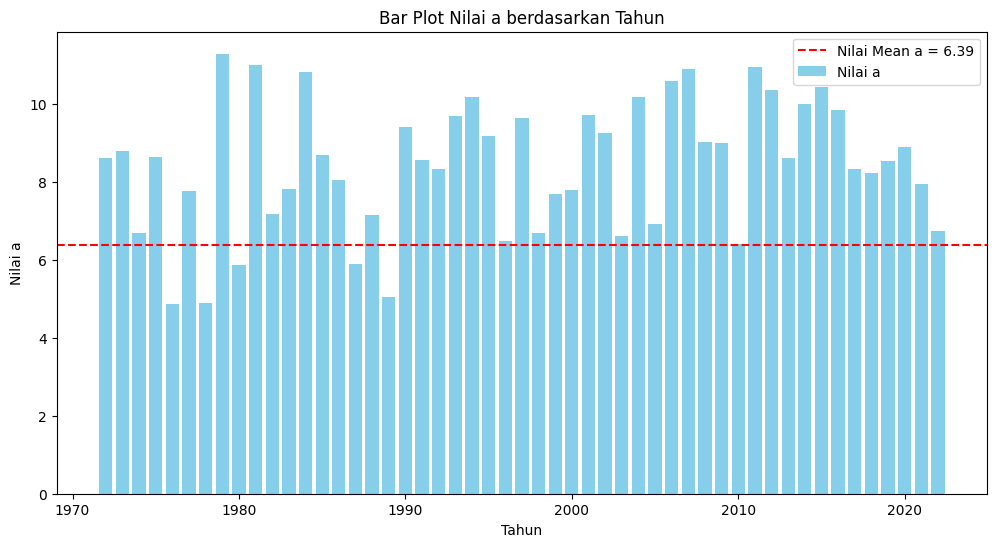

In [40]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 1966 - 2016
filtered_data = fixkolom[(fixkolom['year'] >= 1972) & (fixkolom['year'] <= 2022)]

# Hitung nilai mean dari a-value
mean_a_value = filtered_data['a-value'].mean()

# Plot bar plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['year'], filtered_data['a-value'], color='skyblue', label='Nilai a')
plt.axhline(y=mean_a_value, color='red', linestyle='--', label=f'Nilai Mean a = {mean_a_value:.2f}')
plt.xlabel('Tahun')
plt.ylabel('Nilai a')
plt.title('Bar Plot Nilai a berdasarkan Tahun')
plt.legend()
plt.show()
